In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

# Exploratory Data Analysis - EDA

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.shape

(10886, 12)

In [5]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
print("Holiday: ",  df['holiday'].sum())
print("Workingday: ",  df['workingday'].sum())

Holiday:  311
Workingday:  7412


In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


Let's see what corrolations there are between columns

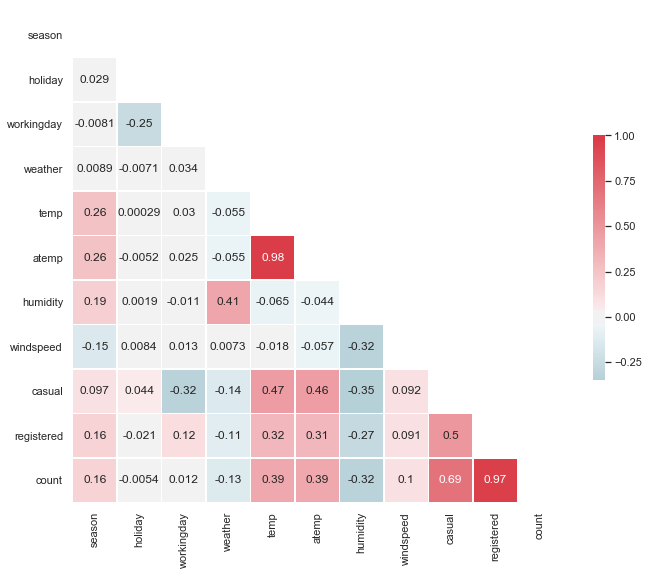

In [9]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

We want to the corrolation between each factor and the count column mainly

casual + registered users = count

temp and season have an interesting impact on count

more registered users on working days

more casual users on holidays

###### Let's create some visualizations

First we break down the datetime column

In [10]:
# count is what we want to know the exact corrolations for
#humidity + working day/holiday/weather seems to have little impact on count
# casual + registered users = count
# temp and season have an interesting impact on count
# more registered users on working days
# more casual users on holidays

In [11]:
def SplitDateTime(df):
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
    df.drop(columns='datetime', inplace=True)
    return

In [12]:
SplitDateTime(df)

In [13]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04


D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


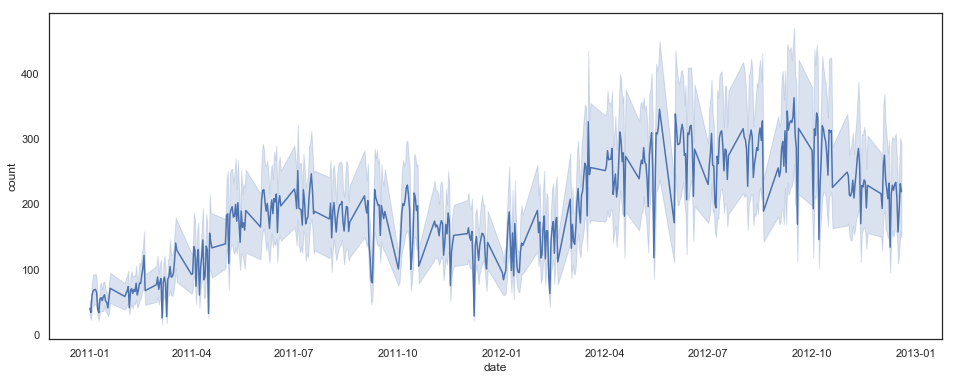

In [14]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['date'], y=df['count'],
             data=df)

The data was recorded over 2 years. Looks like 2nd year had more clients

And that there were more clients over Summer / Autumn

In [15]:
df['month'] = df['date'].dt.strftime("%m")
df['year'] = df['date'].dt.strftime("%Y")
df['month year'] = df['date'].dt.strftime("%m-%Y")

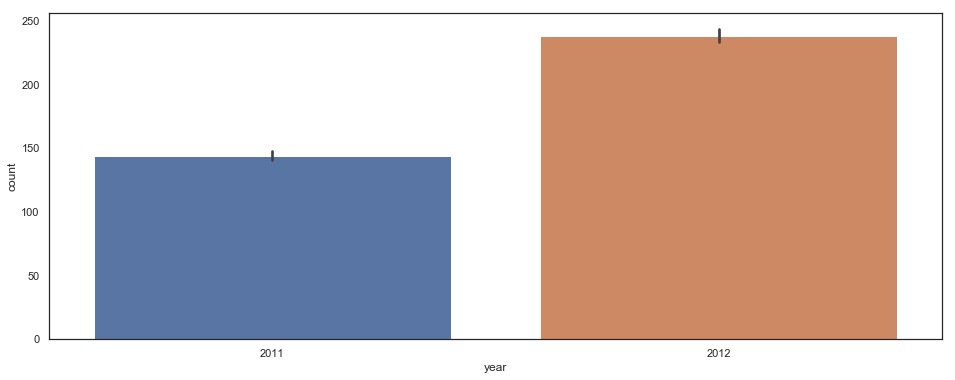

In [16]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['year'], y=df['count'],
             data=df)

2012 had more users

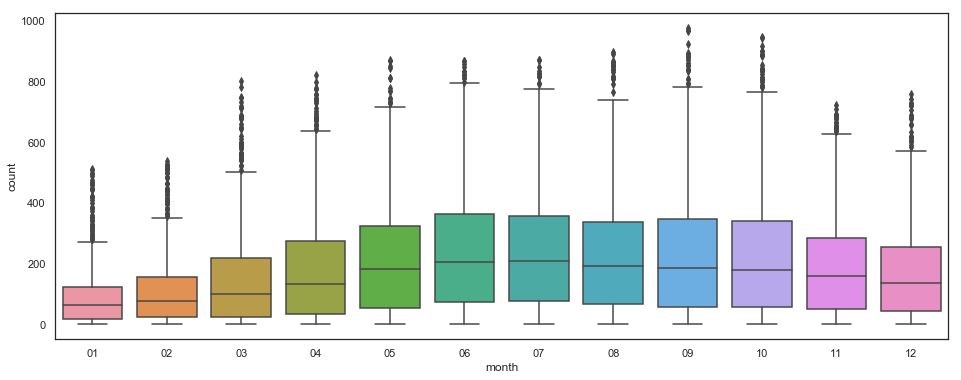

In [17]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df)

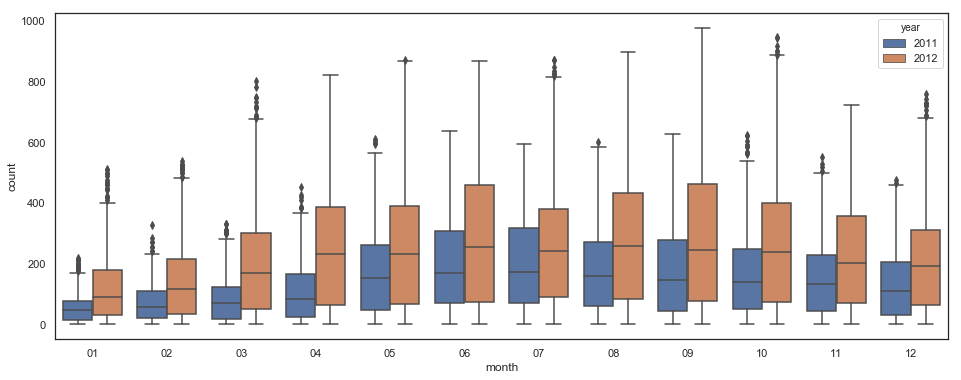

In [18]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month'], y=df['count'],
             data=df, hue='year')

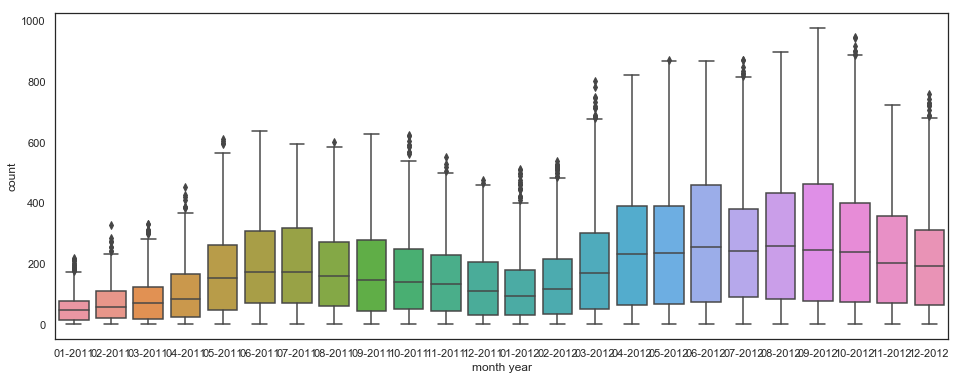

In [19]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['month year'], y=df['count'],
             data=df)

In [20]:
#a lot of outliers each month

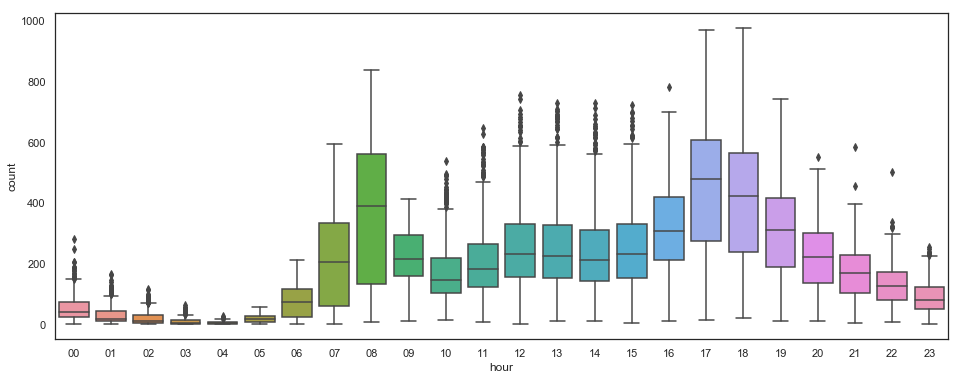

In [21]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['hour'], y=df['count'],
             data=df)

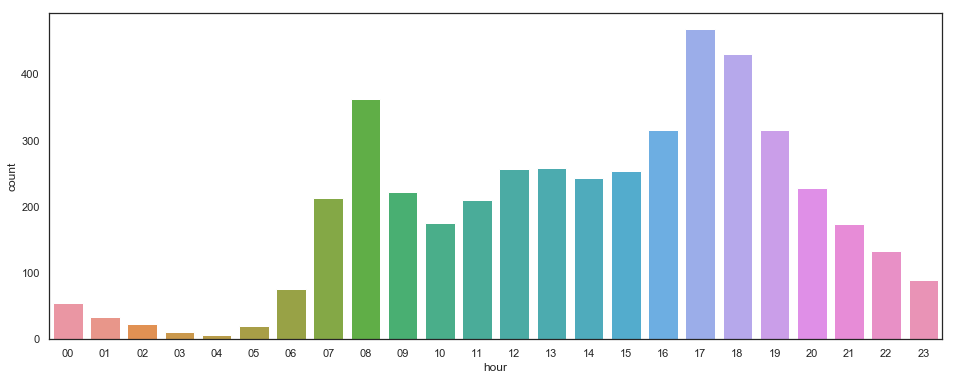

In [22]:
plt.figure(figsize=(16, 6))
dfhour = pd.DataFrame(df.groupby("hour")["count"].mean()).reset_index()
sns.barplot(x="hour", y="count",
           data=dfhour)

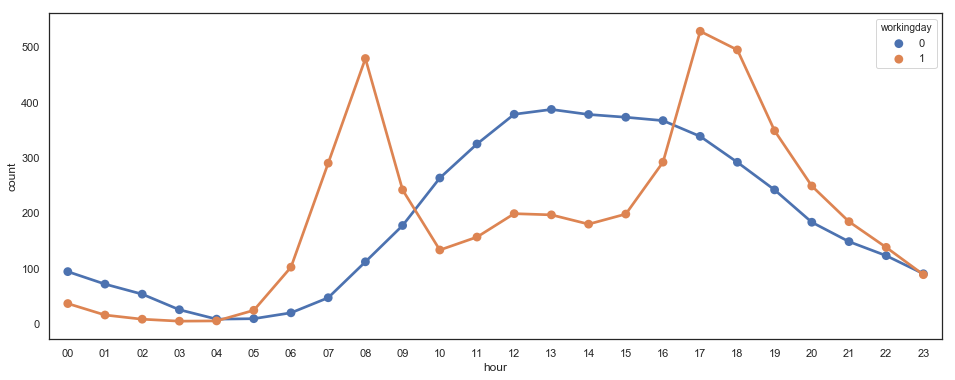

In [23]:
plt.figure(figsize=(16, 6))

dfhour = pd.DataFrame(df.groupby(["hour", "workingday"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=dfhour["hour"], y=dfhour["count"],hue=dfhour["workingday"], data=dfhour)

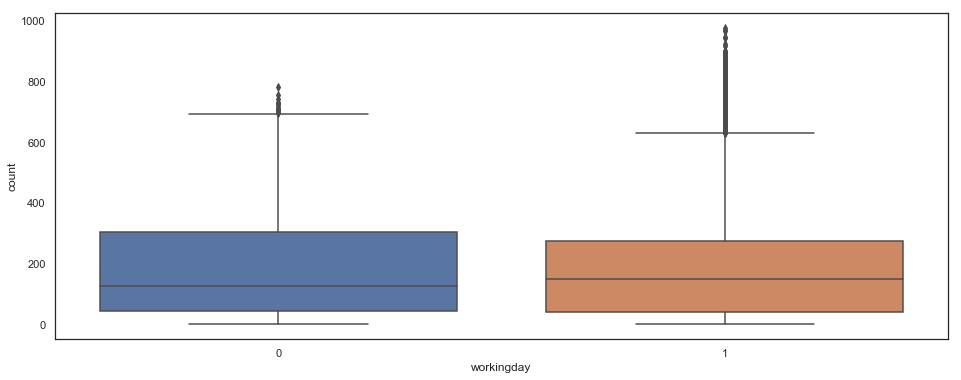

In [24]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['workingday'], y=df['count'],
             data=df)

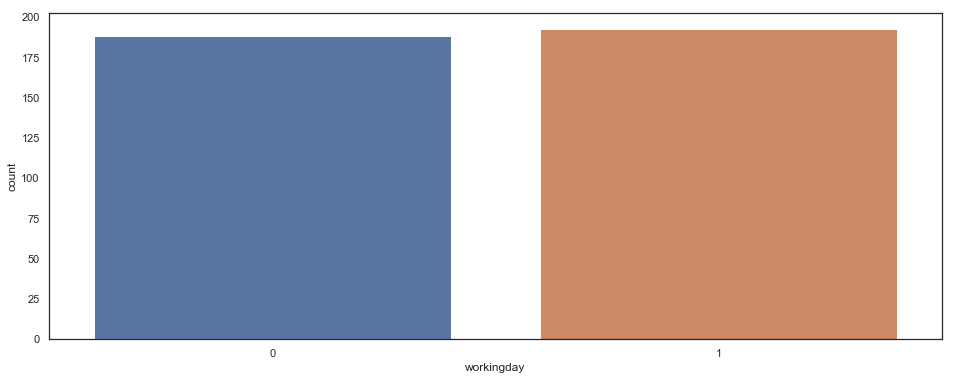

In [25]:
plt.figure(figsize=(16, 6))
dfworking = pd.DataFrame(df.groupby("workingday")["count"].mean()).reset_index()
sns.barplot(x="workingday", y="count",
           data=dfworking)

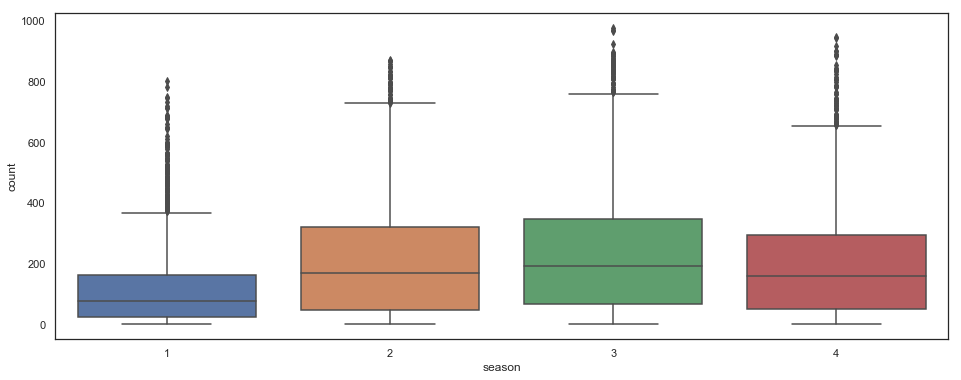

In [26]:
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['season'], y=df['count'],
             data=df)

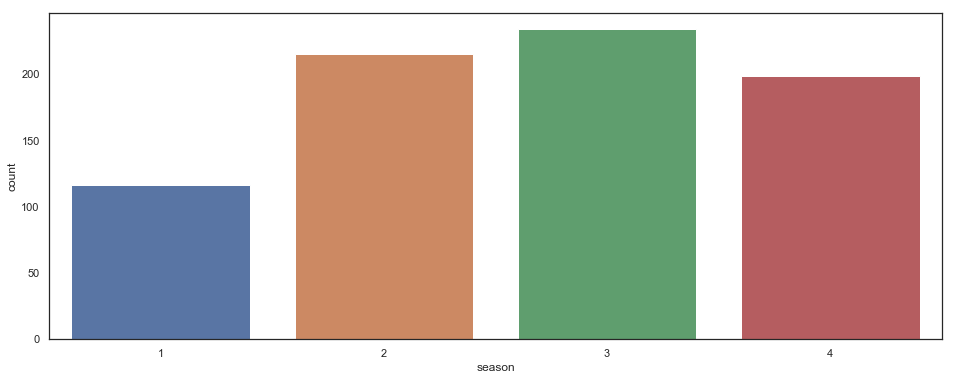

In [27]:
plt.figure(figsize=(16, 6))
dfseason = pd.DataFrame(df.groupby("season")["count"].mean()).reset_index()
sns.barplot(x="season", y="count",
           data=dfseason)



Looks like most users over the summer months, but huge outliers over winter


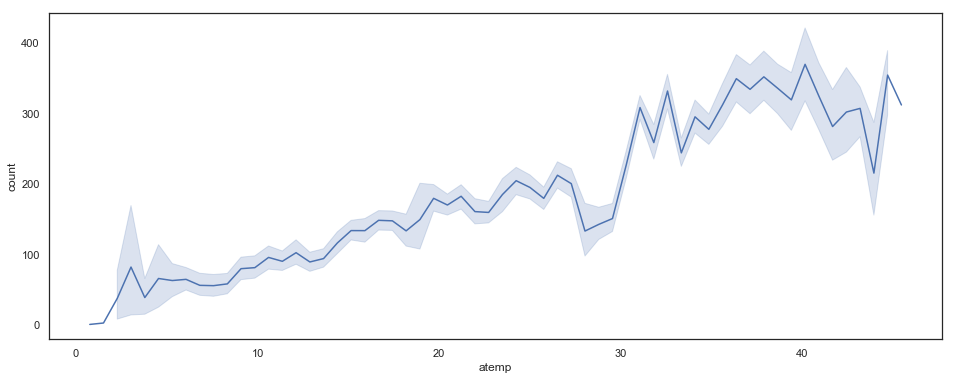

In [28]:
plt.figure(figsize=(16, 6))

sns.lineplot(x=df['atemp'], y=df['count'],
             data=df)

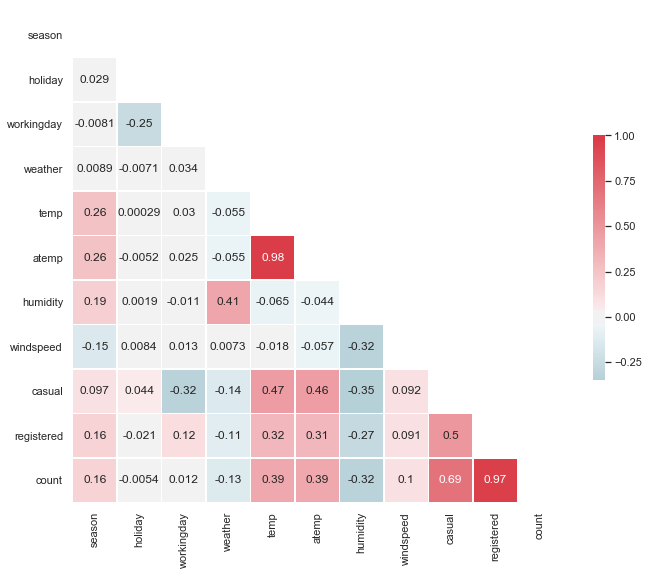

In [29]:
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

* Average users by time of day

* Average users by time of day by type of user, casual vs registered

* Average users by time of day, working day vs non

In [30]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month,year,month year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,01,2011,01-2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011,01-2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,01,2011,01-2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,01,2011,01-2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,01,2011,01-2011


In [31]:
season = pd.get_dummies(df['season'], prefix='season')
weather = pd.get_dummies(df['weather'], prefix='weather')

df = pd.concat([df,season,weather],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 24 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
date          10886 non-null datetime64[ns]
hour          10886 non-null object
month         10886 non-null object
year          10886 non-null object
month year    10886 non-null object
season_1      10886 non-null uint8
season_2      10886 non-null uint8
season_3      10886 non-null uint8
season_4      10886 non-null uint8
weather_1     10886 non-null uint8
weather_2     10886 non-null uint8
weather_3     10886 non-null uint8
weather_4     10886 non-null uint8
dtypes: datetime64[ns](1), float

In [33]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'hour', 'month', 'year', 'month year', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')

In [34]:
df[["hour", "month", "year"]] = df[["hour", "month", "year"]].apply(pd.to_numeric)

In [35]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,6.521495,2011.501929,0.246739,0.251056,0.251056,0.251148,0.660665,0.260334,0.078909,0.000092
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,3.444373,0.500019,0.431133,0.433641,0.433641,0.433694,0.473505,0.438837,0.269609,0.009584
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,4.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,7.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,10.000000,2012.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,12.000000,2012.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X = df.drop(['season', 'weather', 'casual', 'registered',
             'count', 'date', 'month year'], axis = 1)
y = df['count']

In [37]:
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,0,1,2011,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,1,1,2011,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,2,1,2011,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,1,2011,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,4,1,2011,1,0,0,0,1,0,0,0


In [38]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

D:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [41]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

pred[pred < 0] = 0

print('RMSE = ', np.sqrt(mean_squared_error(y_test, pred)))
print('MAE = ', mean_absolute_error(y_test, pred))
print('R^2 = ', explained_variance_score(y_test, pred))
print('RMLSE = ', np.sqrt(mean_squared_log_error(y_test, pred)))

RMSE =  139.36305769655283
MAE =  103.38974079398636
R^2 =  0.40021466017195817
RMLSE =  1.306170748175543


In [42]:
param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gridS = GridSearchCV(lr, cv=5, param_grid=param) 
gridS.fit(X_train, np.log(y_train))
gridS.best_params_, gridS.best_score_ 

lr = gridS.best_estimator_
pred = lr.predict(X_test)

#pred[pred < 0] = 0

print('RMLSE = ', np.sqrt(mean_squared_log_error(y_test, np.exp(pred))))

RMLSE =  1.013338019134406


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [43]:
xgr = xgb.XGBRegressor()
xgr.fit(X_train, np.log(y_train))

xgrpred = xgr.predict(X_test)

#xgrpred[xgrpred < 0] = 0

print('RMSE = ', np.sqrt(mean_squared_error(y_test, xgrpred)))
print('MAE = ', mean_absolute_error(y_test, xgrpred))
print('R^2 =', explained_variance_score(y_test, xgrpred))
print('RMSLE = ', np.sqrt(mean_squared_log_error(y_test, np.exp(xgrpred))))

RMSE =  258.29377746558885
MAE =  186.43537567246932
R^2 = 0.012692225770571053
RMSLE =  0.3212901330646827


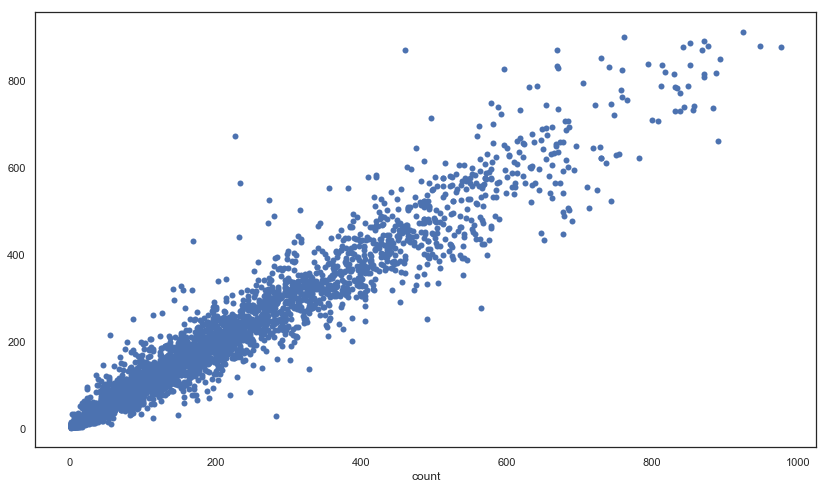

In [44]:
plt.figure(figsize=(14,8))
sns.scatterplot(y_test, np.exp(xgrpred), linewidth=0)

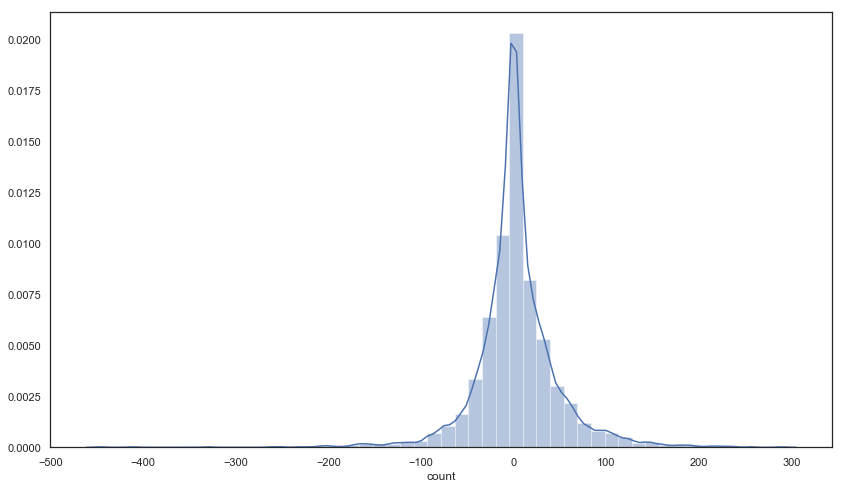

In [45]:
plt.figure(figsize=(14,8))
sns.distplot((y_test - np.exp(xgrpred)))

# Coefficients

In [46]:
cdf = pd.DataFrame(lr.coef_, X.columns, columns=['Coef'])

In [47]:
cdf

,Coef
holiday,-0.091249
workingday,-0.089917
temp,0.029662
atemp,0.027216
humidity,-0.014411
windspeed,0.002713
hour,0.102691
month,0.067349
year,0.424297
season_1,0.089749


#  Test data

In [48]:
test = pd.read_csv('test.csv')

In [49]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [50]:
def FeatureEngineering(df):
    
    df['date'] = df['datetime'].apply(lambda x: x.split()[0])
    df['hour'] = df['datetime'].apply(lambda x: x.split()[1]).apply(lambda x: x.split(':')[0])
    df['date'] = pd.to_datetime(df['date'], dayfirst=True)
        
    df['month'] = df['date'].dt.strftime("%m")
    df['year'] = df['date'].dt.strftime("%Y")
    
    season = pd.get_dummies(df['season'], prefix='season')
    weather = pd.get_dummies(df['weather'], prefix='weather')
    df = pd.concat([df, season, weather],axis=1)
    df[["hour", "month", "year"]] = df[["hour", "month", "year"]].apply(pd.to_numeric)
    
    df = df[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'month', 'year', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'datetime']]
    
    return

In [51]:
FeatureEngineering(test)

In [52]:
season = pd.get_dummies(test['season'], prefix='season')
weather = pd.get_dummies(test['weather'], prefix='weather')
test = pd.concat([test, season, weather],axis=1)
test[["hour", "month", "year"]] = test[["hour", "month", "year"]].apply(pd.to_numeric)
    
test = test[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'month', 'year', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'datetime']]

In [53]:
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,datetime
0,0,1,10.66,11.365,56,26.0027,0,1,2011,1,0,0,0,1,0,0,0,2011-01-20 00:00:00
1,0,1,10.66,13.635,56,0.0000,1,1,2011,1,0,0,0,1,0,0,0,2011-01-20 01:00:00
2,0,1,10.66,13.635,56,0.0000,2,1,2011,1,0,0,0,1,0,0,0,2011-01-20 02:00:00
3,0,1,10.66,12.880,56,11.0014,3,1,2011,1,0,0,0,1,0,0,0,2011-01-20 03:00:00
4,0,1,10.66,12.880,56,11.0014,4,1,2011,1,0,0,0,1,0,0,0,2011-01-20 04:00:00


In [54]:
X.head()

,holiday,workingday,temp,atemp,humidity,windspeed,hour,month,year,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,14.395,81,0.0,0,1,2011,1,0,0,0,1,0,0,0
1,0,0,9.02,13.635,80,0.0,1,1,2011,1,0,0,0,1,0,0,0
2,0,0,9.02,13.635,80,0.0,2,1,2011,1,0,0,0,1,0,0,0
3,0,0,9.84,14.395,75,0.0,3,1,2011,1,0,0,0,1,0,0,0
4,0,0,9.84,14.395,75,0.0,4,1,2011,1,0,0,0,1,0,0,0


In [55]:
test_pred = np.exp(xgr.predict(test.drop('datetime', axis=1)))
#test_pred[test_pred < 0] = 0

In [56]:
np.exp(test_pred)

array([6.0340000e+04, 4.8768097e+01, 1.7131392e+01, ...,           inf,
                 inf, 2.3024568e+30], dtype=float32)

In [57]:
d = {'datetime':test['datetime'],'count':test_pred}
result = pd.DataFrame(d)
result.to_csv('submission.csv',index=False)